In [36]:
from matplotlib import pyplot as plt

In [12]:
f = open("../dat/parsed_books/mml-book.txt", "r")
raw_text = f.read()

## String search as a baseline
Maybe a simple string search can reveal the distribution of concepts.

In [14]:
import re
positions_le = [m.start() for m in re.finditer('linear equation', raw_text)]
positions_lr = [m.start() for m in re.finditer('linear regression', raw_text)]

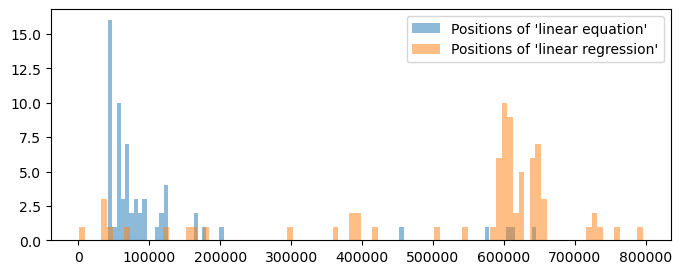

In [15]:

plt.figure(figsize=(8,3))
plt.hist(positions_le, bins=100, alpha=0.5, label="Positions of 'linear equation'")
plt.hist(positions_lr, bins=100, alpha=0.5, label="Positions of 'linear regression'")
plt.legend()
plt.show()

Even though linear regression is mentioned first, it looks like linear equation might be an easier concept because it its center of weight is much earlier in the book than linear regression. This suggests taking median/mean instead of first occurence.

# Use KCs from Wikifier

In [5]:
import pickle
KCs = pickle.load(open("../dat/KCs_mml.pkl", "rb" ))

In [9]:
{title: len(v['occurences']) for title, v in KCs.items() if len(v['occurences']) > 2}

{'Machine learning': 91,
 'Linear algebra': 14,
 'Linear regression': 7,
 'Analytic geometry': 3,
 'Matrix decomposition': 3,
 'Vector calculus': 5,
 'Computer science': 4,
 'Principal component analysis': 5,
 'Mixture model': 3,
 'Support-vector machine': 5,
 'Linear independence': 28,
 'Mathematics': 11,
 'Euclidean vector': 13,
 'Real number': 3,
 'Complex number': 4,
 'Vector space': 40,
 'Dot product': 4,
 'Identity matrix': 5,
 'Kernel (linear algebra)': 3,
 'Subscript and superscript': 13,
 'Random variable': 3,
 'Dimensionality reduction': 7,
 'Tor (rock formation)': 3,
 'System of linear equations': 44,
 'Free variables and bound variables': 4,
 'Matrix (mathematics)': 5,
 'Row and column vectors': 3,
 'Fraction': 48,
 'Matrix multiplication': 11,
 'Gaussian elimination': 11,
 'Augmented matrix': 7,
 'AJB': 3,
 'Row echelon form': 13,
 'Pivot element': 15,
 'Iterative method': 3,
 'Inverse element': 10,
 'Identity element': 10,
 'Abelian group': 4,
 'General linear group': 3,


Let's try an describe the distribution of the terms:

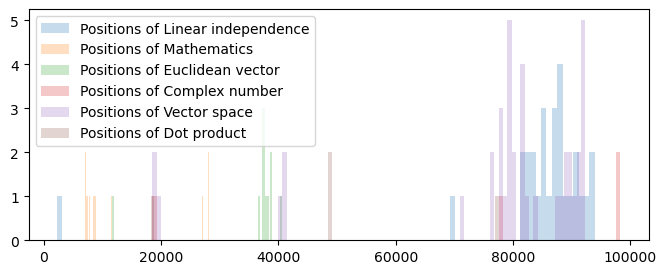

In [24]:
plt.figure(figsize=(8,3))
for title, v in list(KCs.items())[10:50]:
    if len(v['occurences']) > 3:
        plt.hist([o['intvl'].left for o in v['occurences']], bins=100, alpha=0.25, label="Positions of " + title)
plt.legend()
plt.show()

In [10]:
import numpy as np
{title: np.mean([o['intvl'].left for o in v['occurences']]) for title, v in KCs.items() if len(v['occurences']) > 2}

{'Machine learning': 17384.0989010989,
 'Linear algebra': 39458.71428571428,
 'Linear regression': 37112.71428571428,
 'Analytic geometry': 21042.0,
 'Matrix decomposition': 21155.666666666668,
 'Vector calculus': 29952.6,
 'Computer science': 26601.75,
 'Principal component analysis': 16333.6,
 'Mixture model': 18746.333333333332,
 'Support-vector machine': 7695.2,
 'Linear independence': 83492.78571428571,
 'Mathematics': 13653.90909090909,
 'Euclidean vector': 35903.61538461538,
 'Real number': 41572.0,
 'Complex number': 73277.25,
 'Vector space': 75848.375,
 'Dot product': 48476.25,
 'Identity matrix': 49269.0,
 'Kernel (linear algebra)': 60442.666666666664,
 'Subscript and superscript': 76934.76923076923,
 'Random variable': 20232.666666666668,
 'Dimensionality reduction': 41287.0,
 'Tor (rock formation)': 69306.0,
 'System of linear equations': 58327.47727272727,
 'Free variables and bound variables': 58201.0,
 'Matrix (mathematics)': 55098.6,
 'Row and column vectors': 47996.66

# Entire book annotations

In [1]:
file = open("../dat/annotations_Denton.pkl", 'rb')
import pickle
annos = pickle.load(file)

In [27]:
import pandas as pd
import numpy as np
supports = {
    a['title']: 
        {"url": a['url'],
        "occurences": [
            {"intvl": pd.Interval(s['chFrom'], s['chTo']), "pr": s['pageRank']}
        for s in a['support'] if s['pageRank'] > 0]}
    for a in annos
}

KCs = {}
# offset characters and merge with existing supports
for anno in annos:
    if len(anno['support']) > 0: # only for supports with a good page rank
        if not anno['title'] in KCs: # ensure that KC exists
            KCs[anno['title']] = {'url': anno['url'], 'support': []}

        occs = []
        for idx, occ in enumerate(anno['support']):
            occ["intvl"] = pd.Interval(occ['chFrom'], occ['chTo'])
        
        for idx, occ in enumerate(anno['support']):
            # detect overlaps
            current_intvl = occ['intvl']
            overlaps = [o for o in anno['support'] if o['intvl'].overlaps(current_intvl) and occ['intvl'] != o['intvl']]
            if len(overlaps): # if we have overlaps, only take the one with the highest Page Rank
                if np.all([occ['pageRank'] > o['pageRank'] for o in overlaps]): occs.append(occ)
            else:
                occs.append(occ)

        KCs[anno['title']]['support'] += occs 

In [23]:
annos

[{'title': 'Linear algebra',
  'url': 'http://en.wikipedia.org/wiki/Linear_algebra',
  'lang': 'en',
  'pageRank': 0.003625315785992655,
  'cosine': 0.198235085312832,
  'secLang': 'en',
  'secTitle': 'Linear algebra',
  'secUrl': 'http://en.wikipedia.org/wiki/Linear_algebra',
  'wikiDataItemId': 'Q82571',
  'wikiDataClasses': [{'itemId': 'Q1936384', 'enLabel': 'area of mathematics'},
   {'itemId': 'Q11862829', 'enLabel': 'academic discipline'},
   {'itemId': 'Q2465832', 'enLabel': 'branch of science'},
   {'itemId': 'Q1047113', 'enLabel': 'specialty'},
   {'itemId': 'Q9081', 'enLabel': 'knowledge'},
   {'itemId': 'Q492', 'enLabel': 'memory'},
   {'itemId': 'Q1048607', 'enLabel': 'conviction'},
   {'itemId': 'Q14819853', 'enLabel': 'learning or memory'},
   {'itemId': 'Q34394', 'enLabel': 'belief'},
   {'itemId': 'Q2200417', 'enLabel': 'cognition'},
   {'itemId': 'Q2990593', 'enLabel': 'animal behavior'},
   {'itemId': 'Q54989186', 'enLabel': 'mental state'},
   {'itemId': 'Q781413', '

In [30]:
{title: np.median([o['intvl'].left for o in v['support']]) for title, v in KCs.items() if len(v['support']) > 100}

{'Linear algebra': 134805.5,
 'World War I': 293430.5,
 'Logical conjunction': 244516.5,
 'Boron': 212187.0,
 'Full stop': 77299.5,
 'Identity (philosophy)': 257396.0,
 'Plus and minus signs': 257286.5,
 'GNU General Public License': 292089.5,
 'Semicolon': 255893.0,
 'Gujarat': 170439.5,
 'Question mark': 291399.0,
 '. .': 6603.0,
 'Ellipsis': 200150.5,
 'Argon': 234001.0,
 'Vector space': 254541.0,
 'Function (mathematics)': 128397.5,
 'Is-a': 219093.0,
 'Matrix (mathematics)': 214321.5,
 'Matrix multiplication': 204940.0,
 'Multiplication': 185742.0,
 'Peaceful Revolution': 213141.0,
 'Zermelo set theory': 228322.5,
 'Review': 204339.0,
 'Problem solving': 225216.0,
 'Computer': 231141.5,
 'Equation': 145731.5,
 'System of linear equations': 118032.5,
 'COVID-19 pandemic': 243233.0,
 'Set (mathematics)': 230242.0,
 'Inch': 222906.0,
 'Bracket': 259544.0,
 'BBC Radio 4': 206352.0,
 'For loop': 286990.5,
 'Arabic': 245476.5,
 'Addition': 230877.0,
 'Linear map': 249552.0,
 'Orders of 

In [41]:
list(KCs.keys())

['Linear algebra',
 'Algebra',
 'Elementary algebra',
 'David Beckham',
 'Michael Cherney',
 'World War I',
 'Tom Smothers',
 'Tom Denton (footballer)',
 'Denton, Texas',
 'Rohit Chand',
 'Conor Thomas',
 'Logical conjunction',
 'Calvin Andrew',
 'Waldron, Arkansas',
 'BBC Radio 2',
 'Editing',
 "Shakespeare's editors",
 'Boron',
 'Hurricane Katrina',
 'Matt Glaeser',
 'Travis (band)',
 'Jake Scrimshaw',
 'Special edition',
 'ABC News (Australia)',
 'Full stop',
 'David Davis (footballer)',
 'California',
 '2013',
 '2012–13 Serbian Cup',
 'Non-associative algebra',
 'Work (physics)',
 'Identity (philosophy)',
 'Wikipedia',
 'Cognition',
 'Overtime (sports)',
 'The arts',
 'Creative Commons',
 'Creative Commons license',
 'Wikimedia Commons',
 'Plus and minus signs',
 'Share-alike',
 'Bluetooth',
 'Classic Mac OS',
 'MS-DOS',
 'GNU General Public License',
 '.2 Network',
 'Table of contents',
 'Semicolon',
 'Gujarat',
 'Question mark',
 'Mac OS 9',
 'OS/2',
 'Unicode',
 'Java version hi

In [31]:
KCs['Matrix (mathematics)']

{'url': 'http://en.wikipedia.org/wiki/Matrix_(mathematics)',
 'support': [{'wFrom': 141,
   'wTo': 141,
   'chFrom': 544,
   'chTo': 549,
   'pMentionGivenSurface': 0.03601356743814844,
   'pageRank': 0.0003797975053613498,
   'prbConfidence': 0.2619950986155805,
   'entropy': 4.371396575711039,
   'intvl': Interval(544, 549, closed='right')},
  {'wFrom': 167,
   'wTo': 167,
   'chFrom': 605,
   'chTo': 610,
   'pMentionGivenSurface': 0.03601356743814844,
   'pageRank': 0.0003797975053613498,
   'prbConfidence': 0.2619950986155805,
   'entropy': 4.371396575711039,
   'intvl': Interval(605, 610, closed='right')},
  {'wFrom': 179,
   'wTo': 179,
   'chFrom': 674,
   'chTo': 679,
   'pMentionGivenSurface': 0.03601356743814844,
   'pageRank': 0.0003797975053613498,
   'prbConfidence': 0.2619950986155805,
   'entropy': 4.371396575711039,
   'intvl': Interval(674, 679, closed='right')},
  {'wFrom': 266,
   'wTo': 266,
   'chFrom': 927,
   'chTo': 932,
   'pMentionGivenSurface': 0.03601356743

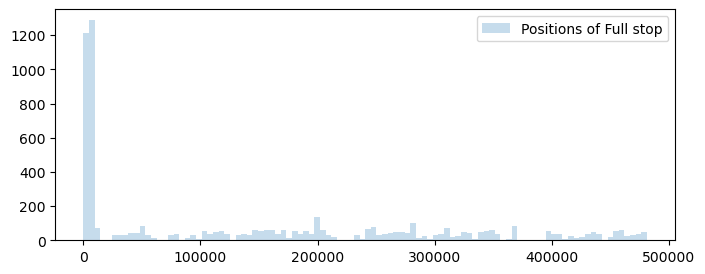

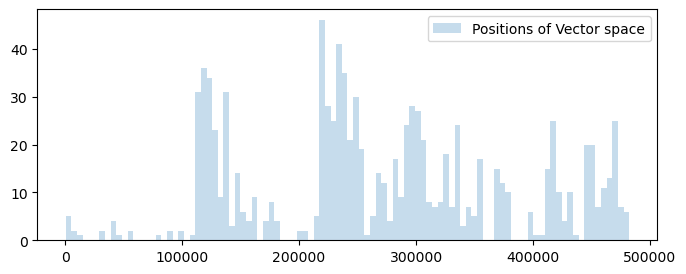

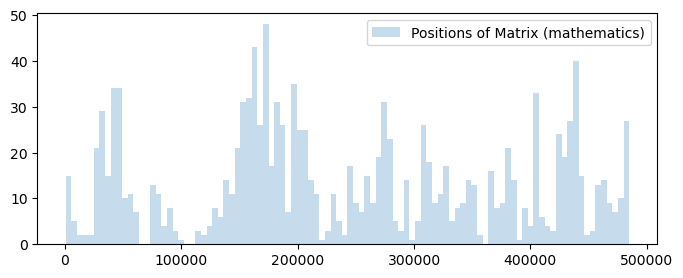

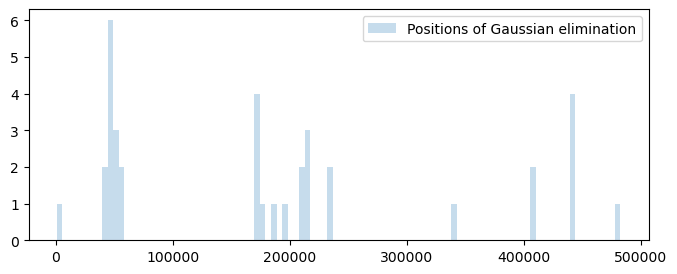

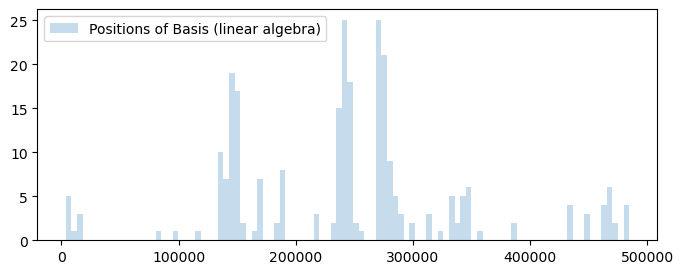

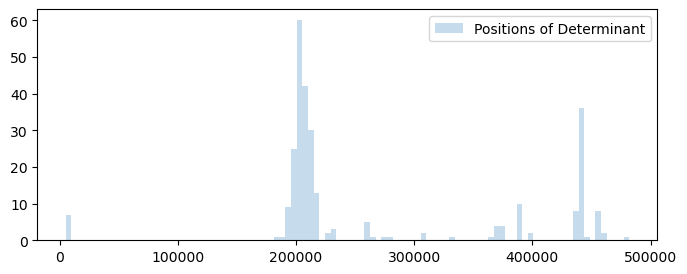

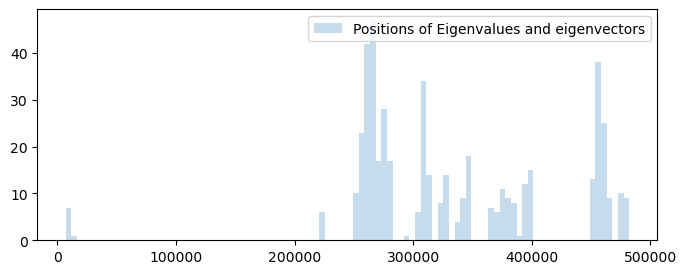

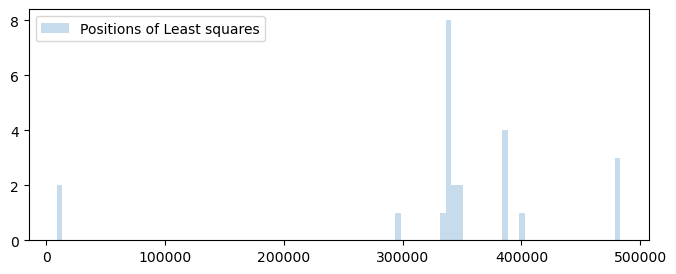

In [50]:
for title, v in list(KCs.items()):
    if title in ["Matrix (mathematics)", 'Vector space', 'Eigenvalues and eigenvectors', 'Gaussian elimination', 'Least squares', 'Basis (linear algebra)', 'Determinant', 'Full stop']:
        plt.figure(figsize=(8,3))
        plt.hist([o['intvl'].left for o in v['support']], bins=100, alpha=0.25, label="Positions of " + title)
        plt.legend()
        plt.show()